## PROGRAM 05

--- k-Nearest Neighbors Classification ---
Training dataset: First 50 points labeled based on rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)
Testing dataset: Remaining 50 points to be classified

Results for k = 1:
Point x51 (value: 0.4356) is classified as Class1
Point x52 (value: 0.0860) is classified as Class1
Point x53 (value: 0.6934) is classified as Class2
Point x54 (value: 0.8191) is classified as Class2
Point x55 (value: 0.4066) is classified as Class1
Point x56 (value: 0.9169) is classified as Class2
Point x57 (value: 0.3204) is classified as Class1
Point x58 (value: 0.3970) is classified as Class1
Point x59 (value: 0.3300) is classified as Class1
Point x60 (value: 0.6525) is classified as Class2
Point x61 (value: 0.5683) is classified as Class2
Point x62 (value: 0.3444) is classified as Class1
Point x63 (value: 0.5615) is classified as Class2
Point x64 (value: 0.1808) is classified as Class1
Point x65 (value: 0.2433) is classified as Class1
Point x66 (value: 0.9123) is classifi

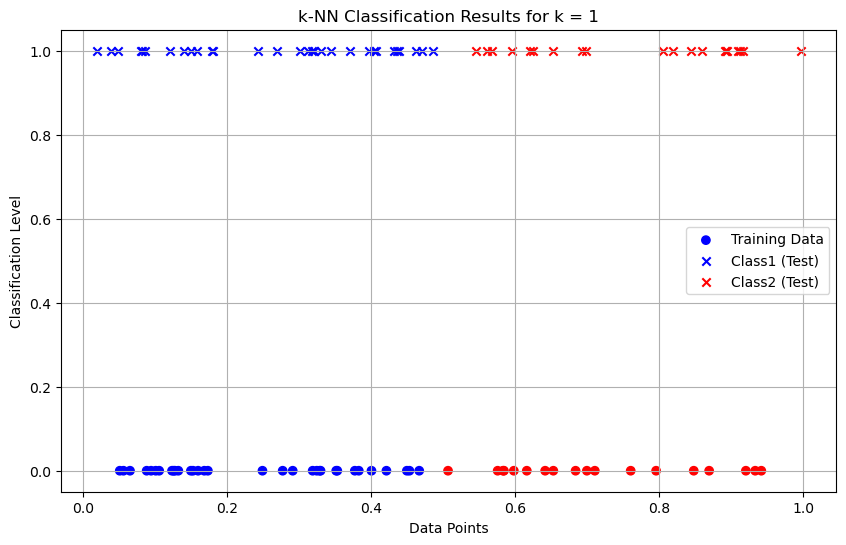

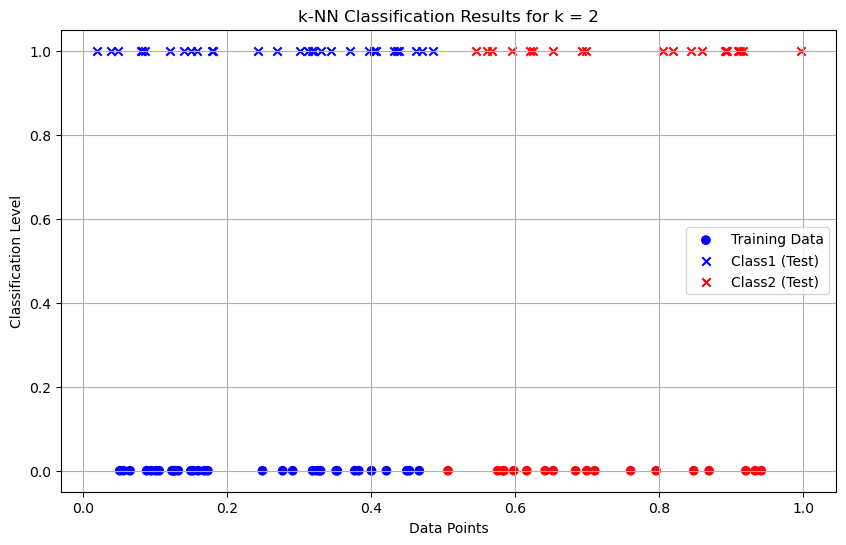

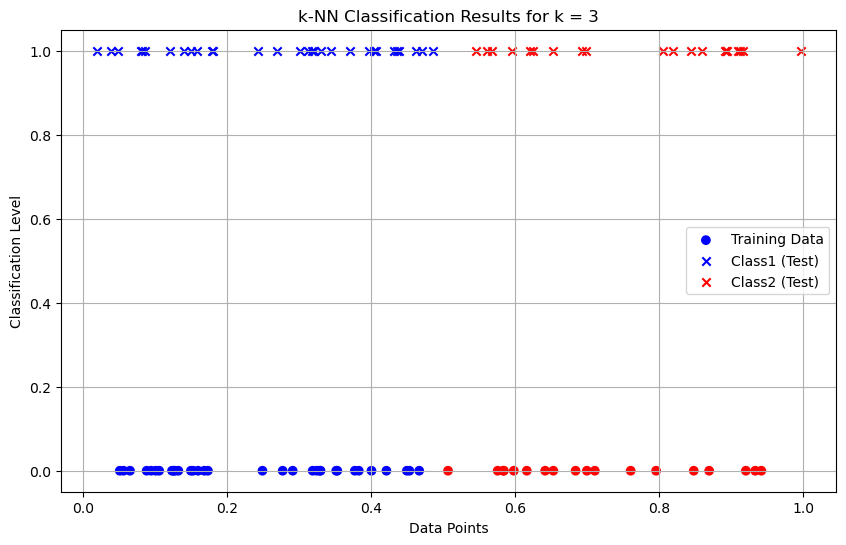

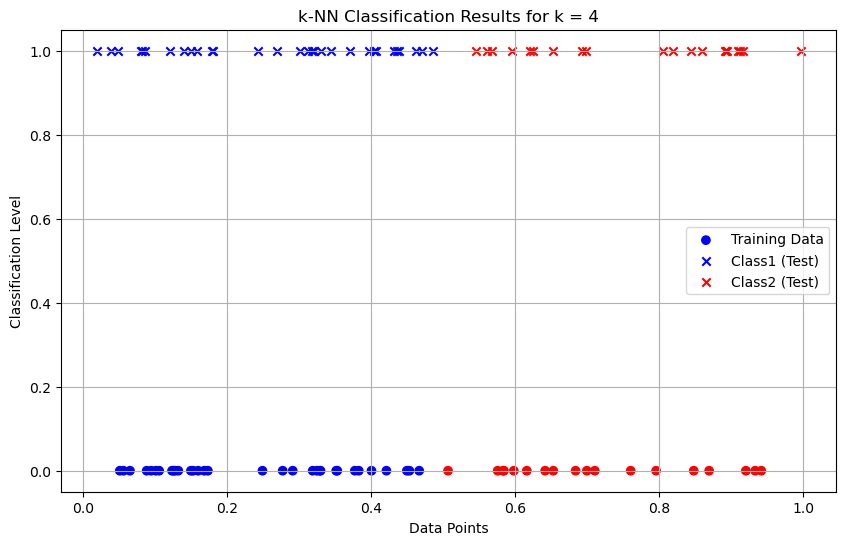

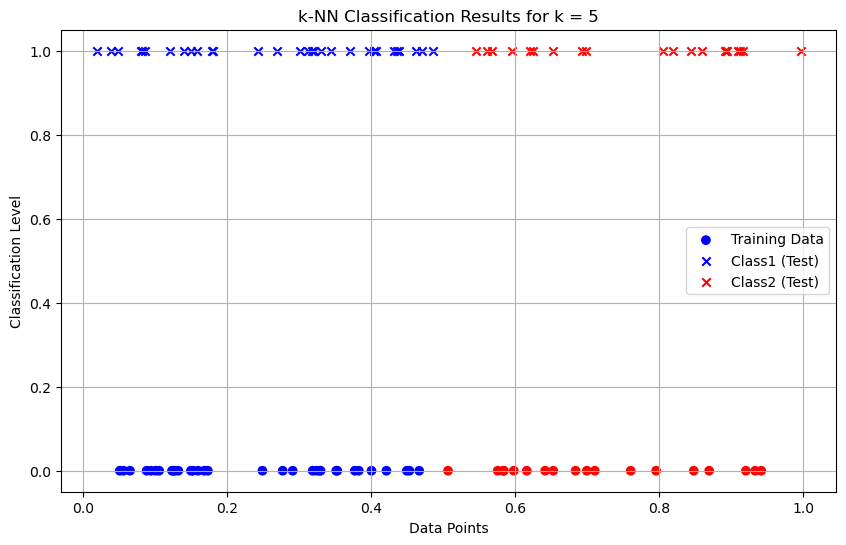

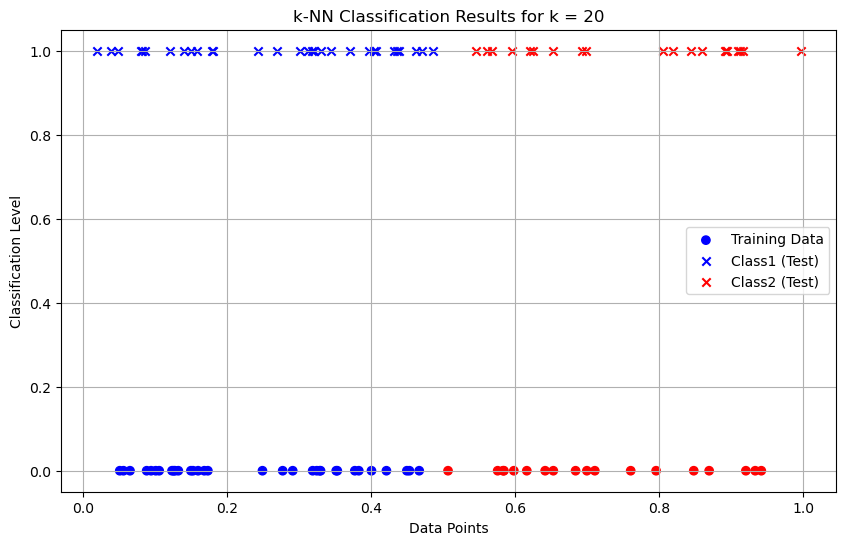

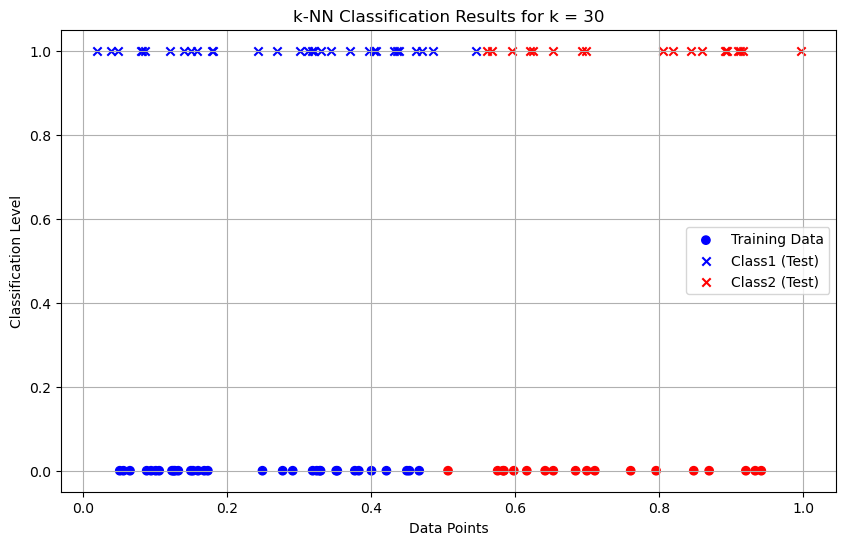

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import Counter

data = np.random.rand(100)

train_data = data[:50]
train_labels = ["Class1" if x <= 0.5 else "Class2" for x in train_data]

test_data = data[50:]
test_labels = ["Class1" if x <= 0.5 else "Class2" for x in test_data]

def euclidean_distance(x1, x2):
    return abs(x1 - x2)

def knn_classifier(train_data, train_labels, test_point, k):
    distances = [(euclidean_distance(test_point, train_data[i]), train_labels[i]) for i in range(len(train_data))]

    k_nearest_neighbors = heapq.nsmallest(k, distances, key=lambda x: x[0])
    
    k_nearest_labels = [label for _, label in k_nearest_neighbors]
    
    return Counter(k_nearest_labels).most_common(1)[0][0]

k_values = [1, 2, 3, 4, 5, 20, 30]

results = {}

print("--- k-Nearest Neighbors Classification ---")
print("Training dataset: First 50 points labeled based on rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)")
print("Testing dataset: Remaining 50 points to be classified\n")

for k in k_values:
    print(f"Results for k = {k}:")
    
    classified_labels = [knn_classifier(train_data, train_labels, test_point, k) for test_point in test_data]
    results[k] = classified_labels

    correct_predictions = sum(1 for i in range(len(test_data)) if classified_labels[i] == test_labels[i])
    accuracy = correct_predictions / len(test_data) * 100
    for i, label in enumerate(classified_labels, start=51):
        print(f"Point x{i} (value: {test_data[i - 51]:.4f}) is classified as {label}")
    
    print(f"Accuracy for k = {k}: {accuracy:.2f}%\n")

for k in k_values:
    classified_labels = results[k]
    
    class1_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class1"]
    class2_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class2"]
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(train_data, [0] * len(train_data),
                c=["blue" if label == "Class1" else "red" for label in train_labels], 
                label="Training Data", marker="o")


    plt.scatter(class1_points, [1] * len(class1_points), c="blue", label="Class1 (Test)", marker="x")
    plt.scatter(class2_points, [1] * len(class2_points), c="red", label="Class2 (Test)", marker="x")
    
    plt.title(f"k-NN Classification Results for k = {k}")
    plt.xlabel("Data Points")
    plt.ylabel("Classification Level")
    plt.legend()
    plt.grid(True)
    plt.show()